# Exercise 9
***

In [6]:
from scipy import stats as sp
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## 1.

In [47]:
ave = 6.3
ave_15 = 15
x = np.arange(1, 30)

In [48]:
f = sp.poisson.pmf(x, ave)
g = sp.poisson.pmf(ave_15, ave)

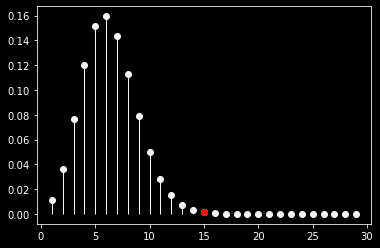

In [49]:
plt.scatter(x, f, color='whitesmoke', marker='o')
plt.scatter(ave_15, g, color='red', marker='o')
plt.vlines(x,0, f, label='hist. average', color='whitesmoke', lw=1)
plt.vlines(ave_15, 0,g, label='2015',color='red', lw=2)
plt.show()

In [50]:
Z = abs(ave - ave_15)/ave

In [51]:
Z

1.380952380952381

Not a significant difference.

## 2.

In [52]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

In [54]:
sigma = np.sqrt((np.std(pre) ** 2 + np.std(post) ** 2)/2)
T = (np.mean(pre) - np.mean(post))/(sigma * np.sqrt(2/len(pre)))

In [58]:
pvalue = sp.t.cdf(T, len(pre) - 1) + (1. - sp.t.cdf(-T, len(pre) - 1))

In [61]:
pvalue

0.0031489409354536393